In [3]:
import pandas as pd
import numpy as np

DATA = 'C:\\Users\\steph\\OneDrive\\Documentos\\MeusProjetos\\Ciencia-de-dados\\dados_hash\\grades.csv'

df = pd.read_csv(DATA)

df.head()

,grades
0,4.2
1,3.9
2,5.7
3,6.5
4,4.6


In [4]:
bins = np.histogram_bin_edges(df['grades'], bins = 'sturges')

bins

array([3.5       , 4.38333333, 5.26666667, 6.15      , 7.03333333,
       7.91666667, 8.8       ])

In [5]:
tamanho_intervalo = bins[1:] - bins[:-1]

tamanho_intervalo_inteiro = np.zeros(len(bins))

tamanho_intervalo_inteiro[1:] = np.ceil(tamanho_intervalo)


bins_arredondados = bins[0] + np.cumsum(tamanho_intervalo_inteiro)

bins_arredondados

array([3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5])

In [6]:
df_notas = pd.cut(
    df['grades'], bins = bins_arredondados, include_lowest=True, right = False
).value_counts().sort_index().to_frame()

df_notas

,count
grades,
"[3.5, 4.5)",5
"[4.5, 5.5)",9
"[5.5, 6.5)",7
"[6.5, 7.5)",7
"[7.5, 8.5)",1
"[8.5, 9.5)",1


In [7]:
import sys
import os
sys.path.append(os.path.abspath('../'))

In [9]:
from meus_modulos.auxiliares import tabela_dist_freq

tabela_dist_freq(df_notas, 'count', True)

,frequencia,frequencia_relativa,frequencia_acumulada,frequencia_relativa_acumulada
grades,,,,
"[3.5, 4.5)",5,0.166667,5,0.166667
"[4.5, 5.5)",9,0.300000,14,0.466667
"[5.5, 6.5)",7,0.233333,21,0.700000
"[6.5, 7.5)",7,0.233333,28,0.933333
"[7.5, 8.5)",1,0.033333,29,0.966667
"[8.5, 9.5)",1,0.033333,30,1.000000


<Axes: ylabel='Frequency'>

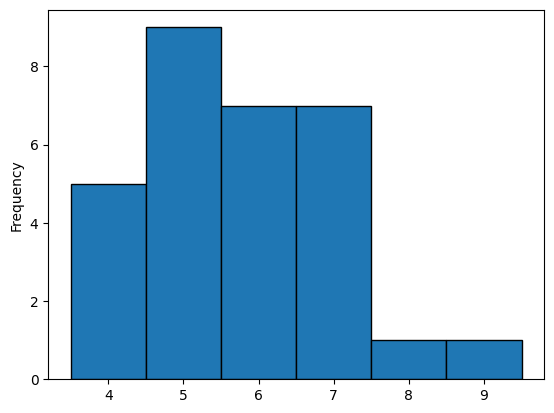

In [11]:
df['grades'].plot.hist(bins = bins_arredondados, edgecolor = 'black')

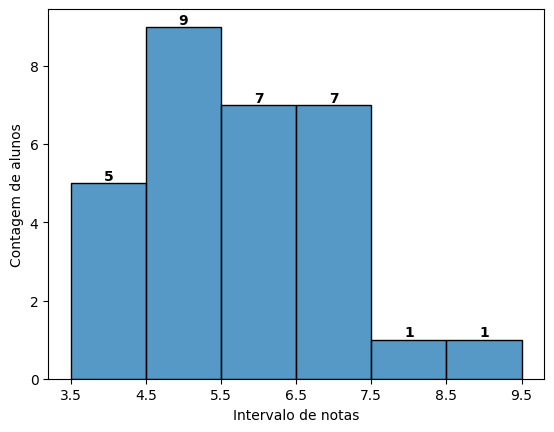

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

h = sns.histplot(df, x = 'grades', bins = bins_arredondados)

for barra in h.containers:
    h.bar_label(barra, color = 'black', fontweight = 'bold')

h.set_xticks(bins_arredondados)
h.set_xlabel('Intervalo de notas')
h.set_ylabel('Contagem de alunos')

plt.show()

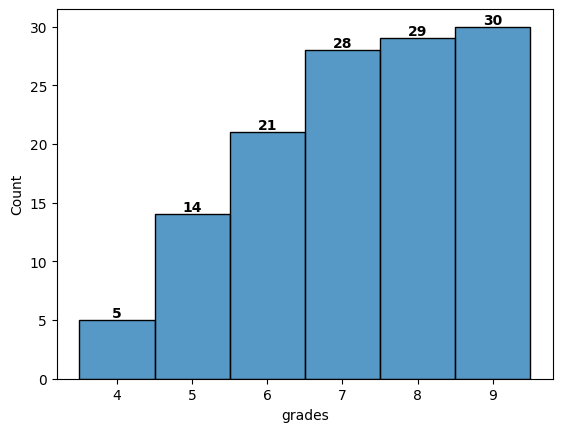

In [18]:
h = sns.histplot(df, x = 'grades', bins = bins_arredondados, cumulative=True)

for barra in h.containers:
    h.bar_label(barra, color = 'black', fontweight = 'bold')

plt.show()

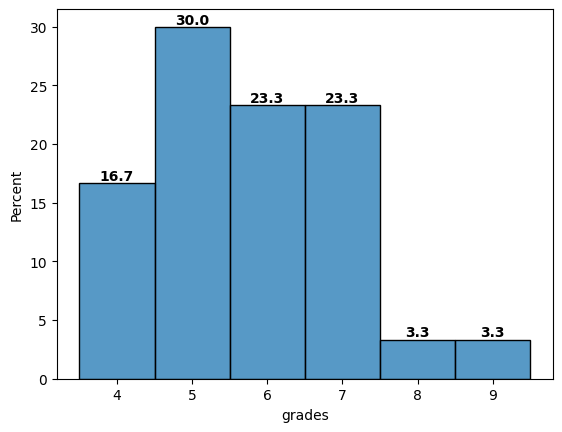

In [20]:
h = sns.histplot(df, x = 'grades', bins = bins_arredondados, stat = 'percent')

for barra in h.containers:
    h.bar_label(
        barra, 
        color = 'black', 
        fontweight = 'bold', 
        labels = [f'{b.get_height():.1f}' for b in barra]
    )

plt.show()

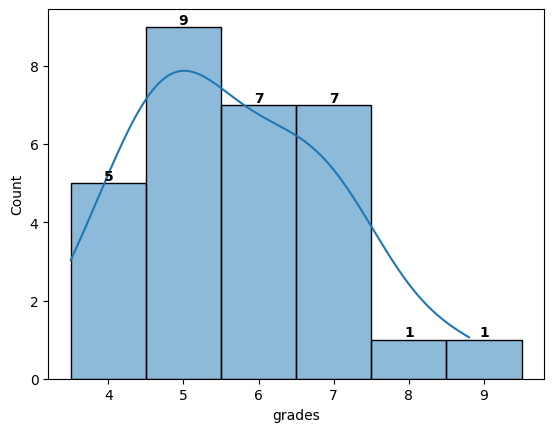

In [21]:
h = sns.histplot(df, x = 'grades', bins = bins_arredondados, kde = True)

for barra in h.containers:
    h.bar_label(
        barra, 
        color = 'black', 
        fontweight = 'bold', 
    )

plt.show()